# Visualisation

In [75]:
%matplotlib inline

import geopandas
import seaborn
import contextily
import matplotlib.pyplot as plt
import pandas

db = geopandas.read_file('data/texas.shp')

## Non-spatial visualisation

### Univariate continuous

* Histograms

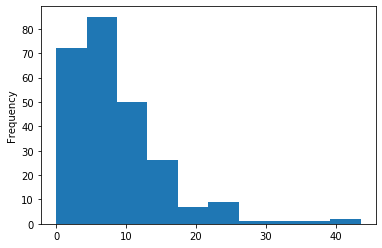

In [76]:
db['HR90'].plot.hist()

* KDEs

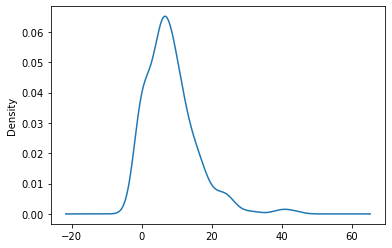

In [77]:
db['HR90'].plot.kde()

### Bivariate continuous

* Scatter plots

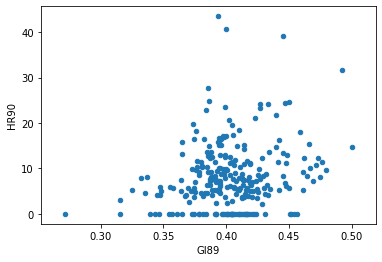

In [78]:
db[['GI89', 'HR90']]\
  .plot.scatter('GI89', 
                'HR90')

* Hexbin plots

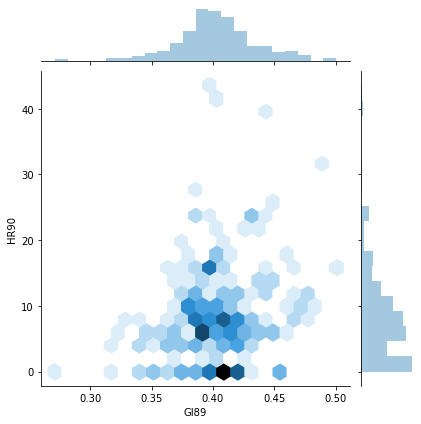

In [79]:
seaborn.jointplot('GI89', 
                  'HR90', 
                  db, 
                  kind='hex')

* 2D KDEs

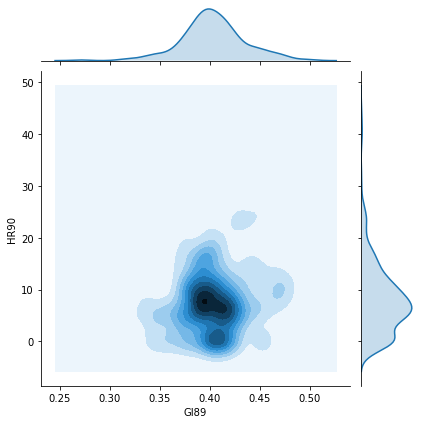

In [80]:
seaborn.jointplot('GI89', 
                  'HR90', 
                  db, 
                  kind='kde')

### Categorical plots

* Categorical scatter plots

In [81]:
db.PO90

0        3143
1        2858
2        5461
3        5848
4        9128
        ...  
249       460
250     40518
251    383545
252     17705
253    260120
Name: PO90, Length: 254, dtype: int64

In [82]:
p90max = db.PO90.max()

In [83]:
width = int(p90max/3)+2
db['pop_cats'] = pandas.cut(db.PO90, [0, 5000, 100000, p90max])

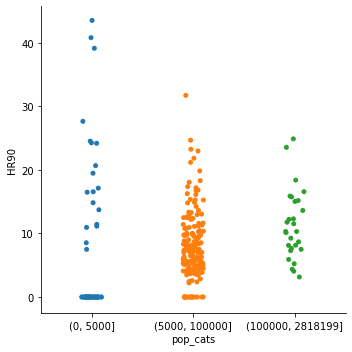

In [84]:
seaborn.catplot(x="pop_cats",
                y="HR90",
                data=db)

* Box plots

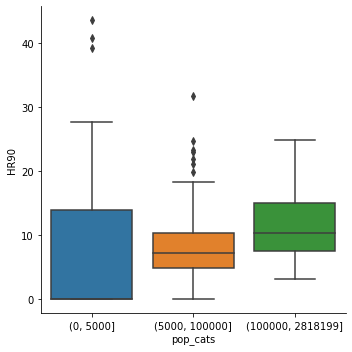

In [85]:
seaborn.catplot(x="pop_cats",
                y="HR90",
                data=db,
                kind='box')

* Violin plots

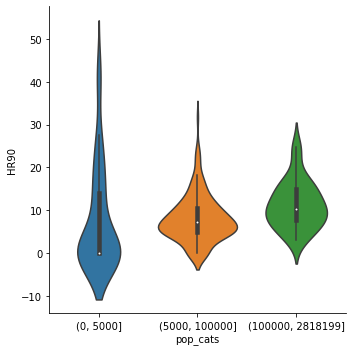

In [86]:
seaborn.catplot(x="pop_cats",
                y="HR90",
                data=db,
                kind='violin')

## Anatomy of a graphic

### Figures

In [87]:
f = plt.figure()

<Figure size 432x288 with 0 Axes>

* Change size

In [88]:
# Size
f = plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

### Axes

* One axis (`ax`) inside a figure (`f`)

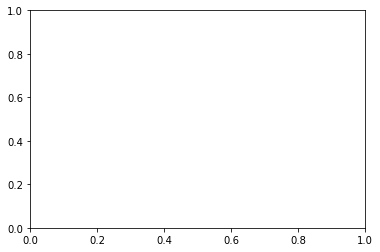

In [89]:
f, ax = plt.subplots(1)

* Two rows, one column of axes (`axs`) inside a figure (`f`)

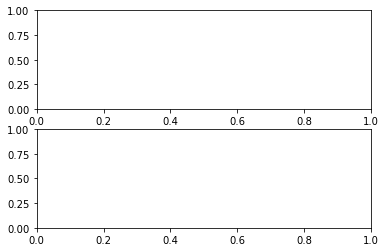

In [90]:
f, axs = plt.subplots(2)

* One row, two columns of axes (`axs`) inside a figure (`f`)

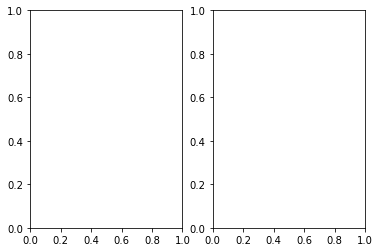

In [91]:
f, axs = plt.subplots(1, 2)

* Embed data on an axis

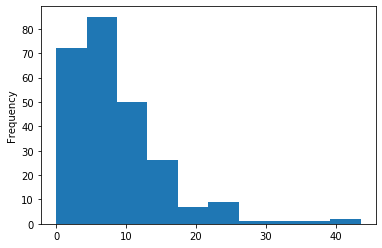

In [92]:
f, ax = plt.subplots(1)
db['HR90'].plot.hist()
#db.plot(ax=ax)

* Embed data on two axes

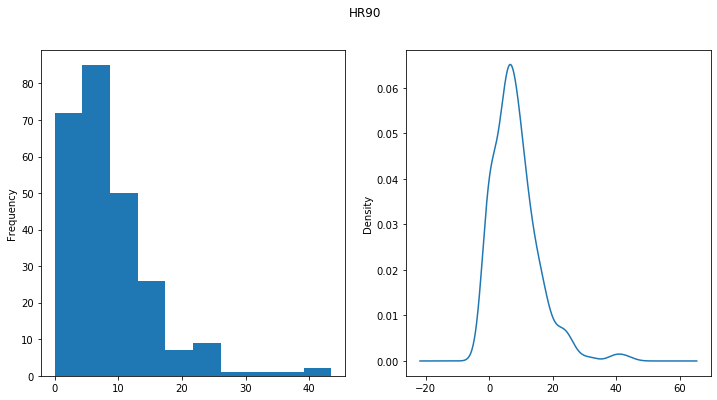

In [93]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# First axis

db['HR90'].plot.hist(ax=axs[0])
# Second axis
db['HR90'].plot.kde(ax=axs[1])
# Title
f.suptitle("HR90")
# Display
plt.show()

### Layers

* Tweak a layer

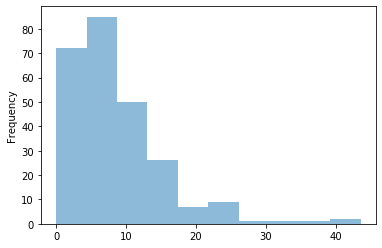

In [94]:
# Transparency
db.HR90.plot.hist(alpha=0.5)

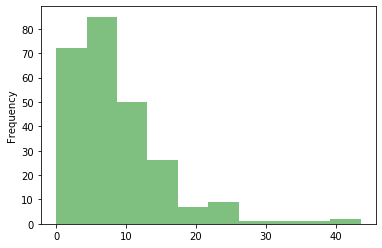

In [95]:
# color and transparency
db.HR90.plot.hist(alpha=0.5, color='green')

## Exercises

* Create a scatter plot using `seaborn`'s `jointplot` (hint: have a look at the `seaborn`'s tutorial for [plotting bivariate distributions](http://seaborn.pydata.org/tutorial/distributions.html#plotting-bivariate-distributions)) 
* Replicate the Boxplot using the `boxen` option for a cooler alternative
* Create a figure with three subplots displaying the following:
    - Histogram of the `HR90`
    - Scatter plot of `HR90` against `GI89`
    - KDE of the `GI89`